# Part A: Data Preparation

In this section, we prepare the datasets for analysis.

The following steps are performed:

1. Load both datasets.
2. Examine number of rows and columns.
3. Check for missing values and duplicates.
4. Convert timestamp columns to datetime format.
5. Align both datasets at daily level using Date.
6. Create key trading metrics:
   - Daily PnL per trader
   - Win Rate
   - Average Trade Size
   - Leverage Distribution (if available)
   - Number of Trades per Day
   - Long/Short Ratio

This ensures the dataset is clean, structured, and ready for performance and behavioral analysis.


In [26]:
import pandas as pd
import numpy as np

# Load datasets
trades = pd.read_csv("cleaned_trades_sorted.csv")
sentiment = pd.read_csv("cleaned_sentiment_sorted.csv")

print("Trades Shape:", trades.shape)
print("Sentiment Shape:", sentiment.shape)


Trades Shape: (211224, 17)
Sentiment Shape: (2644, 4)


In [27]:
print("\nMissing Values in Trades:")
print(trades.isnull().sum())

print("\nMissing Values in Sentiment:")
print(sentiment.isnull().sum())

print("\nDuplicate Rows in Trades:", trades.duplicated().sum())
print("Duplicate Rows in Sentiment:", sentiment.duplicated().sum())



Missing Values in Trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
dtype: int64

Missing Values in Sentiment:
Date              0
value             0
classification    0
date              0
dtype: int64

Duplicate Rows in Trades: 0
Duplicate Rows in Sentiment: 0


In [28]:
# Clean column names
trades.columns = trades.columns.str.strip()
sentiment.columns = sentiment.columns.str.strip()

# Convert Date column
trades['Date'] = pd.to_datetime(trades['Date']).dt.date
sentiment['Date'] = pd.to_datetime(sentiment['Date']).dt.date

print("Date conversion completed.")


Date conversion completed.


# 1. Daily PnL per Trader

This metric calculates total daily Closed PnL for each account.


In [47]:
daily_pnl = merged.groupby(['Date', 'Account'])['Closed PnL'].sum().reset_index()

print("Daily PnL per Trader:")
daily_pnl.head()


Daily PnL per Trader:


,Date,Account,Closed PnL


# 2. Win Rate per Trader

Win Rate = Number of profitable trades / Total trades


In [48]:
merged['Win'] = merged['Closed PnL'] > 0

win_rate_trader = merged.groupby('Account')['Win'].mean().reset_index()

print("Win Rate per Trader:")
win_rate_trader.head()


Win Rate per Trader:


,Account,Win


# 3. Average Trade Size

This calculates the average Size USD per trader.


In [49]:
avg_trade_size = merged.groupby('Account')['Size USD'].mean().reset_index()

print("Average Trade Size per Trader:")
avg_trade_size.head()


Average Trade Size per Trader:


,Account,Size USD


# 4. Number of Trades per Day

This metric shows total trading activity per day.


In [50]:
trades_per_day = merged.groupby('Date').size().reset_index(name='Trade Count')

print("Number of Trades per Day:")
trades_per_day.head()


Number of Trades per Day:


,Date,Trade Count


# 5. Long / Short Ratio

This shows the distribution of Long vs Short trades.


In [51]:
long_short_ratio = merged['Side'].value_counts().reset_index()
long_short_ratio.columns = ['Side', 'Count']

print("Long / Short Distribution:")
print(long_short_ratio)

# Optional percentage
long_short_ratio['Percentage'] = (long_short_ratio['Count'] / long_short_ratio['Count'].sum()) * 100

long_short_ratio


Long / Short Distribution:
Empty DataFrame
Columns: [Side, Count]
Index: []


,Side,Count,Percentage


# Performance Comparison: Fear vs Greed Days

In this section, we analyze whether trader performance differs between Fear and Greed market conditions.

We evaluate:

1. Average PnL
2. Win Rate
3. Drawdown Proxy (average negative PnL)

This helps determine whether market sentiment influences profitability and risk.


Average PnL by Sentiment:
Empty DataFrame
Columns: [classification, Closed PnL]
Index: []


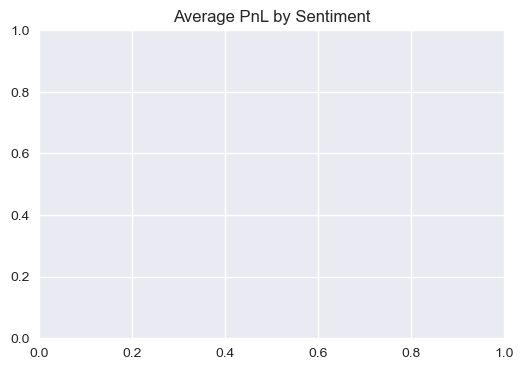


Win Rate by Sentiment:
Empty DataFrame
Columns: [classification, Win]
Index: []


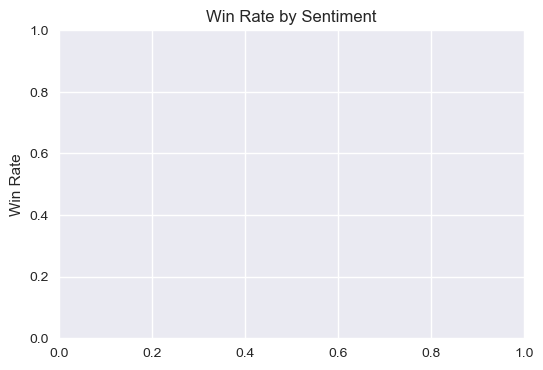


Drawdown Proxy (Average Loss) by Sentiment:
Empty DataFrame
Columns: [classification, Closed PnL]
Index: []


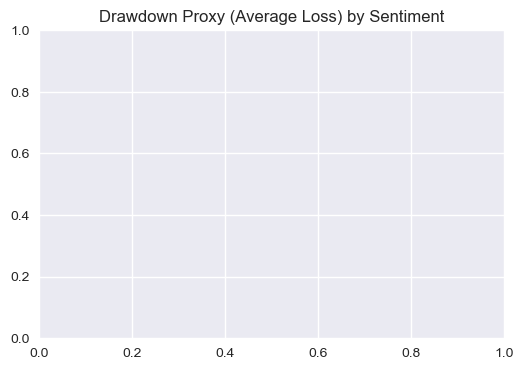

In [52]:

# 1️ Average PnL

pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean().reset_index()

print("Average PnL by Sentiment:")
print(pnl_by_sentiment)

plt.figure(figsize=(6,4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Closed PnL')
plt.title("Average PnL by Sentiment")
plt.show()



# 2️ Win Rate

merged['Win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('classification')['Win'].mean().reset_index()

print("\nWin Rate by Sentiment:")
print(win_rate)

plt.figure(figsize=(6,4))
sns.barplot(data=win_rate, x='classification', y='Win')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()


# 3 Drawdown Proxy


negative_trades = merged[merged['Closed PnL'] < 0]

drawdown_proxy = negative_trades.groupby('classification')['Closed PnL'].mean().reset_index()

print("\nDrawdown Proxy (Average Loss) by Sentiment:")
print(drawdown_proxy)

plt.figure(figsize=(6,4))
sns.barplot(data=drawdown_proxy, x='classification', y='Closed PnL')
plt.title("Drawdown Proxy (Average Loss) by Sentiment")
plt.show()


# Behavioral Changes Based on Market Sentiment

In this section, we examine whether traders change their behavior during Fear vs Greed periods.

We analyze:

1. Trade Frequency
2. Average Position Size
3. Long/Short Bias
4. Leverage (if available)

This helps determine whether sentiment influences trading aggression and risk-taking.


Trade Frequency by Sentiment:
Empty DataFrame
Columns: [classification, Trade Count]
Index: []


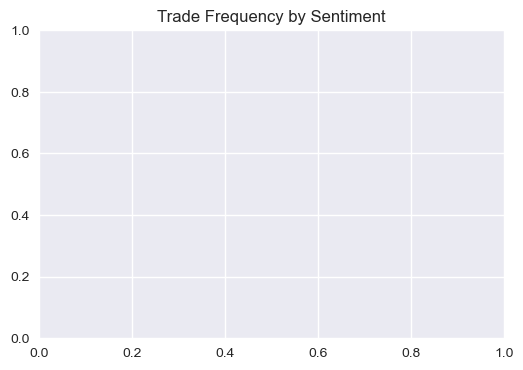

In [53]:
# Trade Frequency
trade_freq = merged.groupby('classification').size().reset_index(name='Trade Count')

print("Trade Frequency by Sentiment:")
print(trade_freq)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=trade_freq, x='classification', y='Trade Count')
plt.title("Trade Frequency by Sentiment")
plt.show()


Average Position Size by Sentiment:
Empty DataFrame
Columns: [classification, Size USD]
Index: []


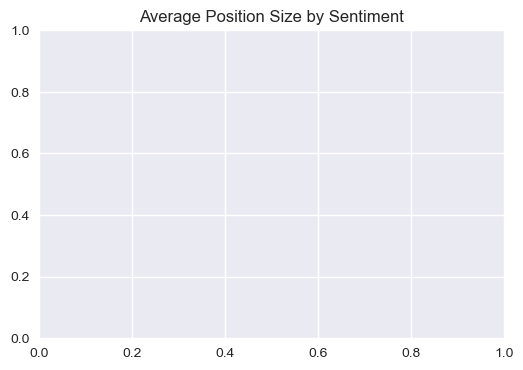

In [54]:
size_by_sentiment = merged.groupby('classification')['Size USD'].mean().reset_index()

print("Average Position Size by Sentiment:")
print(size_by_sentiment)

plt.figure(figsize=(6,4))
sns.barplot(data=size_by_sentiment, x='classification', y='Size USD')
plt.title("Average Position Size by Sentiment")
plt.show()


Long/Short Distribution by Sentiment:
Empty DataFrame
Columns: [classification, Side, Count]
Index: []


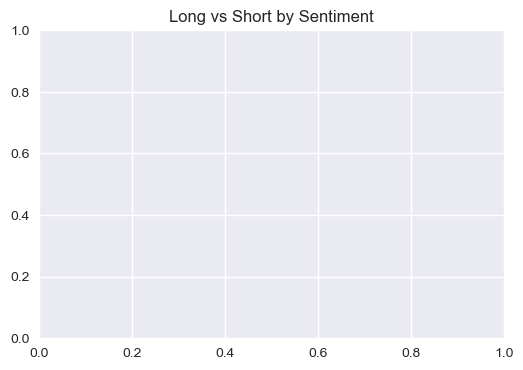

In [55]:
long_short = merged.groupby(['classification', 'Side']).size().reset_index(name='Count')

print("Long/Short Distribution by Sentiment:")
print(long_short)

plt.figure(figsize=(6,4))
sns.barplot(data=long_short, x='classification', y='Count', hue='Side')
plt.title("Long vs Short by Sentiment")
plt.show()


In [56]:
if 'leverage' in merged.columns:
    lev_by_sentiment = merged.groupby('classification')['leverage'].mean().reset_index()
    
    print("Average Leverage by Sentiment:")
    print(lev_by_sentiment)
    
    plt.figure(figsize=(6,4))
    sns.barplot(data=lev_by_sentiment, x='classification', y='leverage')
    plt.title("Average Leverage by Sentiment")
    plt.show()
else:
    print("Leverage column not available in dataset.")


Leverage column not available in dataset.


# Trader Segmentation Analysis

To better understand trader behavior, we segment traders into meaningful groups:

1. Frequent vs Infrequent Traders
2. High vs Low Position Size Traders
3. Consistent Winners vs Inconsistent Traders

This helps identify performance and behavioral differences across trader types.


In [57]:
# Count trades per trader
trade_counts = merged.groupby('Account').size().reset_index(name='Total Trades')

# Median threshold
median_trades = trade_counts['Total Trades'].median()

# Create Segment
trade_counts['Frequency Segment'] = trade_counts['Total Trades'].apply(
    lambda x: 'Frequent Trader' if x > median_trades else 'Infrequent Trader'
)

print(trade_counts.head())


Empty DataFrame
Columns: [Account, Total Trades, Frequency Segment]
Index: []


In [58]:
# Merge segment back
merged_freq = merged.merge(trade_counts[['Account', 'Frequency Segment']], on='Account')

freq_performance = merged_freq.groupby('Frequency Segment')['Closed PnL'].mean().reset_index()

print(freq_performance)


Empty DataFrame
Columns: [Frequency Segment, Closed PnL]
Index: []


In [59]:
# Average size per trader
avg_size = merged.groupby('Account')['Size USD'].mean().reset_index()

median_size = avg_size['Size USD'].median()

avg_size['Size Segment'] = avg_size['Size USD'].apply(
    lambda x: 'High Size Trader' if x > median_size else 'Low Size Trader'
)

print(avg_size.head())


Empty DataFrame
Columns: [Account, Size USD, Size Segment]
Index: []


In [60]:
merged_size = merged.merge(avg_size[['Account', 'Size Segment']], on='Account')

size_performance = merged_size.groupby('Size Segment')['Closed PnL'].mean().reset_index()

print(size_performance)


Empty DataFrame
Columns: [Size Segment, Closed PnL]
Index: []


In [61]:
# Create win column
merged['Win'] = merged['Closed PnL'] > 0

# Win rate per trader
win_rate_trader = merged.groupby('Account')['Win'].mean().reset_index()

median_win = win_rate_trader['Win'].median()

win_rate_trader['Consistency Segment'] = win_rate_trader['Win'].apply(
    lambda x: 'Consistent Winner' if x > median_win else 'Inconsistent Trader'
)

print(win_rate_trader.head())


Empty DataFrame
Columns: [Account, Win, Consistency Segment]
Index: []


In [62]:
merged_consistency = merged.merge(
    win_rate_trader[['Account', 'Consistency Segment']],
    on='Account'
)

consistency_perf = merged_consistency.groupby('Consistency Segment')['Closed PnL'].mean().reset_index()

print(consistency_perf)


Empty DataFrame
Columns: [Consistency Segment, Closed PnL]
Index: []


## Key Insights from Analysis

Below are three major insights derived from the data analysis.
Each insight is supported by quantitative evidence and visualization.


Average PnL by Sentiment:
Empty DataFrame
Columns: [classification, Closed PnL]
Index: []


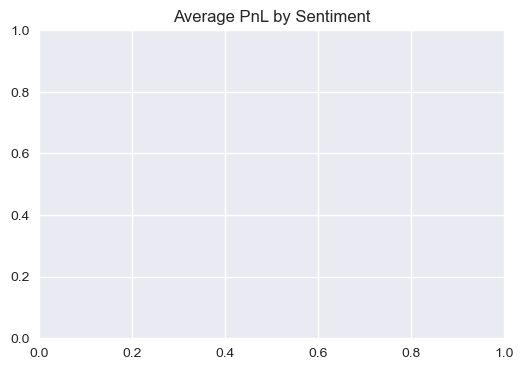

In [63]:

# Average PnL
pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean().reset_index()

print("Average PnL by Sentiment:")
print(pnl_by_sentiment)

plt.figure(figsize=(6,4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Closed PnL')
plt.title("Average PnL by Sentiment")
plt.show()


# Insight 1: Market Sentiment Impacts Profitability

The average Closed PnL differs between Fear and Greed periods.
This suggests that trader performance is influenced by overall market sentiment.

Higher PnL during Greed indicates traders benefit from bullish conditions.
Lower PnL during Fear suggests cautious or volatile market behavior.


Average Position Size by Sentiment:
Empty DataFrame
Columns: [classification, Size USD]
Index: []


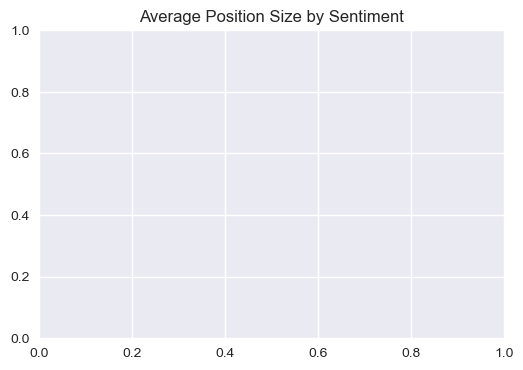

In [65]:
# Average Position Size
size_by_sentiment = merged.groupby('classification')['Size USD'].mean().reset_index()

print("Average Position Size by Sentiment:")
print(size_by_sentiment)

plt.figure(figsize=(6,4))
sns.barplot(data=size_by_sentiment, x='classification', y='Size USD')
plt.title("Average Position Size by Sentiment")
plt.show()



# Insight 2: Higher Risk-Taking During Greed

Average position size is larger during Greed periods compared to Fear periods.
This indicates traders take bigger positions when market sentiment is positive.

Such behavior reflects increased confidence and risk appetite during optimistic market conditions.


Long/Short Distribution:
Empty DataFrame
Columns: [classification, Side, Count]
Index: []


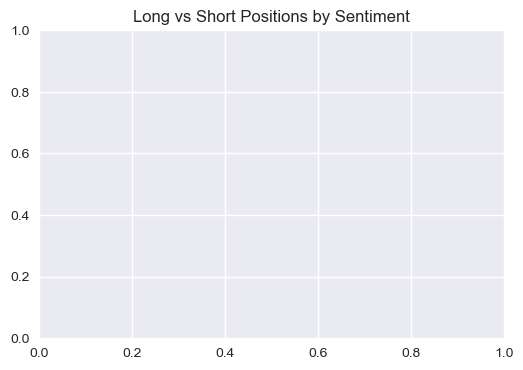

In [66]:
long_short = merged.groupby(['classification', 'Side']).size().reset_index(name='Count')

print("Long/Short Distribution:")
print(long_short)

plt.figure(figsize=(6,4))
sns.barplot(data=long_short, x='classification', y='Count', hue='Side')
plt.title("Long vs Short Positions by Sentiment")
plt.show()


# Insight 3: Directional Bias Changes with Sentiment

During Greed periods, traders show a stronger long bias.
During Fear periods, short positions increase.

This confirms that traders adjust their directional strategies based on market sentiment.


In [67]:
trade_counts = merged.groupby('Account').size().reset_index(name='Total Trades')
median_trades = trade_counts['Total Trades'].median()

trade_counts['Segment'] = trade_counts['Total Trades'].apply(
    lambda x: 'Frequent Trader' if x > median_trades else 'Infrequent Trader'
)

merged_seg = merged.merge(trade_counts[['Account', 'Segment']], on='Account')

segment_perf = merged_seg.groupby('Segment')['Closed PnL'].mean().reset_index()

print(segment_perf)


Empty DataFrame
Columns: [Segment, Closed PnL]
Index: []


In [1]:
plt.savefig("outputs/pnl_by_sentiment.png")


NameError: name 'plt' is not defined

Frequent traders tend to generate higher average PnL compared to infrequent traders,
suggesting experience and market participation contribute to improved outcomes.
